### Get a Feel on MNIST

torch.Size([4, 1, 28, 28])


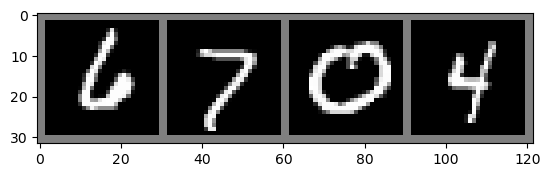

Labels: [6, 7, 0, 4]


In [2]:
# Install Dependencies 
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # mean=0.1307, std=0.3081
    # transforms.Normalize((0.5,), (0.5,))  # higher quality images (normalize less)
])

# Download and load the MNIST training dataset
train_dataset = torchvision.datasets.MNIST(root='./PyTorchCNN/data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)


# Get a batch of images and labels
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape)

# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images))
print('Labels:', labels.tolist())


### Important Observations 
#### What are the inputs to cross-entropy error function?
Basically the input to any error function is the true lables and the predicted probabilities (scores). In case of cross-entropy error function, true lables are turned to one-hot encoded vectors. The formula is: $$- \sum_i y_i \cdot \log(p_i) $$ where $y_i$ is a one-hot encoded vector representing the true class and $p_i$ is the predicted probability of the corresponding class.

#### How and why are these inputs normalized?
In cross-entropy error function, normalizing typically refers to the normalization of the predicted probabilities. This normalization is commonly achieved through the softmax activation function. 
$$ \text{softmax}(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{k} e^{z_j}} $$

Normalization is applied for several reasons:

_Numerical Stability:_ Normalizing the predicted probabilities helps maintain numerical stability during the training process. The softmax function is sensitive to large input values, and normalization prevents overflow or underflow issues.

_Consistency with Loss Definition:_ The cross-entropy loss is defined based on probabilities. Normalizing the true labels as one-hot encoded vectors and normalizing the predicted probabilities ensures consistency in the definition of the loss function.

_Comparison and Interpretability:_ Normalized probabilities allow for a meaningful comparison between the true labels and predictions. The cross-entropy loss penalizes the model more when it is confident about incorrect predictions, and normalization facilitates this comparison.

#### What is the impact of learning rate, batch size and momentum?
The learning rate, batch size, and momentum are hyperparameters that significantly impact the training process and the performance of a machine learning model, especially in the context of optimization algorithms like stochastic gradient descent (SGD) and its variants. Here's an overview of their impact:

<b>1. Learning Rate:</b>

* Impact: Learning rate is one of the most critical hyperparameters. It controls the size of the step that the optimization algorithm takes during each iteration. A too small learning rate may result in slow convergence or getting stuck in local minima, while a too large learning rate may cause the optimization to oscillate or diverge.
* Effect on Training:
    - Higher Learning Rate: Faster convergence but may overshoot the minimum and lead to instability.
    - Lower Learning Rate: Slower convergence but more stable and less likely to overshoot.
* Tuning:
    - Learning rate is often tuned through experimentation. Common values are in the range of 0.1, 0.01, 0.001, etc.
    - Techniques like learning rate schedules or adaptive learning rate methods (e.g., Adam, Adagrad) can help automatically adjust the learning rate during training.

<b>2. Batch Size:</b>

* Impact: Batch size determines the number of samples used in each iteration of training. It affects the quality of the optimization and the computational efficiency.
* Effect on Training:
    - Larger Batch Size: Smoother convergence, may lead to faster training on hardware optimized for parallel processing (e.g., GPUs).
    - Smaller Batch Size: More noisy updates, but can generalize better and might converge to a better minimum.
* Tuning:
    - Batch size is often chosen based on the available computational resources. Common values are 32, 64, 128, etc.
    - Smaller batch sizes may require learning rate adjustments (e.g., a smaller learning rate).

<b>3. Momentum: </b>

* Impact: Momentum is a term added to the optimization algorithm to accelerate convergence and escape local minima. It helps the optimization algorithm to keep moving in the same direction.
* Effect on Training:
    - Higher Momentum: Faster convergence, better ability to overcome small local minima.
    - Lower Momentum: Slower convergence, but may help avoid oscillations in some cases.
* Tuning:
    - Common values for momentum are 0.9, 0.95, or higher.
    - Momentum is often used in combination with learning rate, and the combination of both should be tuned for optimal performance.
